In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:

path='/content/drive/MyDrive/Skin-Cancer-Classification-80-10-10 split/hmnist_28_28_RGB.csv'


In [ ]:
df=pd.read_csv(path)


In [ ]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [ ]:
fractions = np.array([0.8, 0.1, 0.1])
df = df.sample(frac=1)  # Shuffle the DataFrame

train_set, validation_set, test_set = np.array_split(
    df, (fractions.cumsum() * len(df)).astype(int)[:-1]
)

In [ ]:
print(len(train_set))

8012


In [ ]:
print(len(test_set))

1002


In [ ]:
df.label.unique()

array([4, 3, 2, 6, 5, 1, 0])

In [ ]:

classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

In [ ]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train)


In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


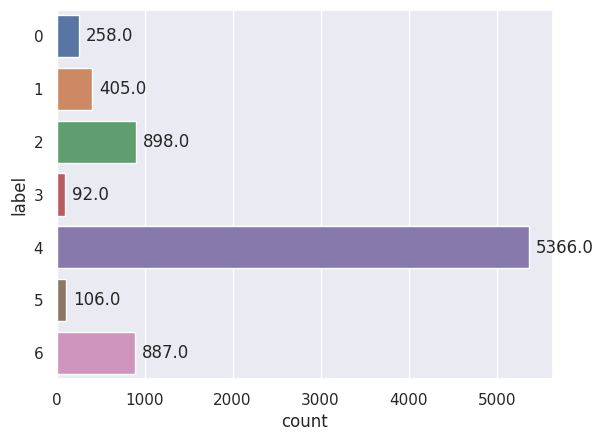

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming y_train is a Series or a list with labels
sns.set(style="darkgrid")  # Set the style for better visibility

# Create the count plot with annotations
ax = sns.countplot(y=y_train)

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()  # Display the plot

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

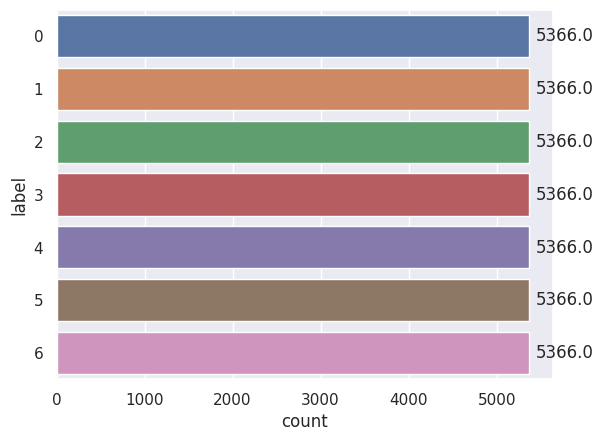

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming y_train is a Series or a list with labels
sns.set(style="darkgrid")  # Set the style for better visibility

# Create the count plot with annotations
ax = sns.countplot(y=y_train)

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()  # Display the plot

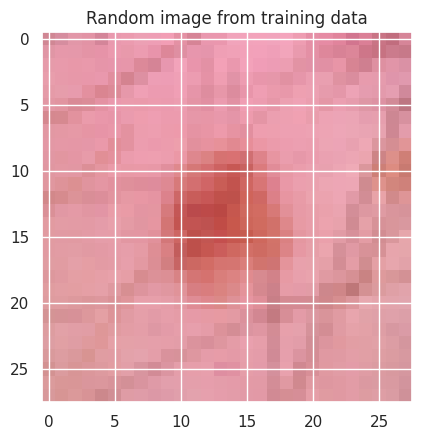

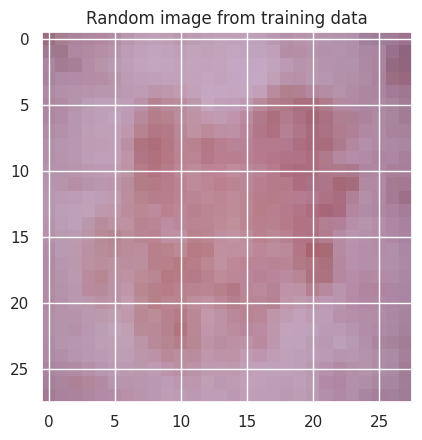

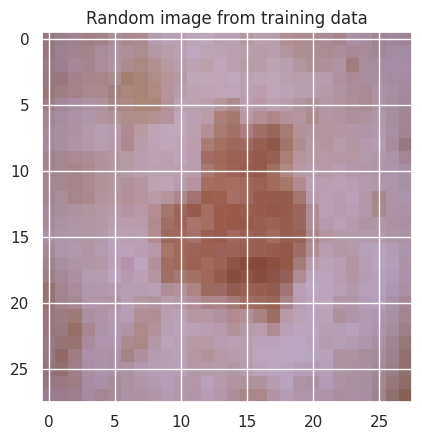

In [ ]:
import matplotlib.pyplot as plt
import random
num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

In [ ]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
import tensorflow as tf

In [ ]:


# Load the DenseNet-169 model (include_top=False means excluding the fully connected layers)
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
model = Sequential()

# Add the pre-trained DenseNet-169 base model
model.add(base_model)

# Flatten the output of the base model
model.add(Flatten())

# Add your own dense layers on top
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))

# Display the model summary
model.summary()


51877672/51877672 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 1, 1, 1664)        12642880  
                                                                 
 flatten (Flatten)           (None, 1664)              0         
                                                                 
 dropout (Dropout)           (None, 1664)              0         
                                                                 
 dense (Dense)               (None, 256)               426240    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0 

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Dense.h5',

    mode='max',
    verbose=1,
    save_best_only=True
)




In [ ]:
from sklearn.model_selection import train_test_split

# Assuming x_train and y_train are your features and labels

# First, split the data into training and temporary sets (80% training, 20% temporary)
x_train_temp, x_temp, y_train_temp, y_temp = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Then, split the temporary set into validation and test sets (50% each)
x_validation, x_test, y_validation, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42
)

# Resize images to (32, 32)
x_train_resized = tf.image.resize(x_train_temp, (32, 32))

# Now, you have the following splits:
# - x_train_resized, y_train_temp: 80% for training
# - x_validation, y_validation: 10% for validation
# - x_test, y_test: 10% for testing

# Continue with the model compilation and training using x_train_resized and y_train_temp
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(x_train_resized,
                    y_train_temp,
                    validation_data=(x_validation, y_validation),
                    batch_size=128,
                    epochs=50,
                    shuffle=True,
                    callbacks=[callback])


Epoch 1/50
235/235 [==============================] - ETA: 0s - loss: 0.8664 - accuracy: 0.6791
Epoch 1: val_loss did not improve from 1.82137
235/235 [==============================] - 30s 55ms/step - loss: 0.8664 - accuracy: 0.6791 - val_loss: 0.9466 - val_accuracy: 0.7106
Epoch 2/50
235/235 [==============================] - ETA: 0s - loss: 0.7782 - accuracy: 0.7126
Epoch 2: val_loss did not improve from 1.82137
235/235 [==============================] - 10s 42ms/step - loss: 0.7782 - accuracy: 0.7126 - val_loss: 0.5805 - val_accuracy: 0.7872
Epoch 3/50
234/235 [============================>.] - ETA: 0s - loss: 0.7316 - accuracy: 0.7280
Epoch 3: val_loss did not improve from 1.82137
235/235 [==============================] - 11s 47ms/step - loss: 0.7313 - accuracy: 0.7281 - val_loss: 0.5137 - val_accuracy: 0.8226
Epoch 4/50
234/235 [============================>.] - ETA: 0s - loss: 0.6876 - accuracy: 0.7443
Epoch 4: val_loss did not improve from 1.82137
235/235 [====================

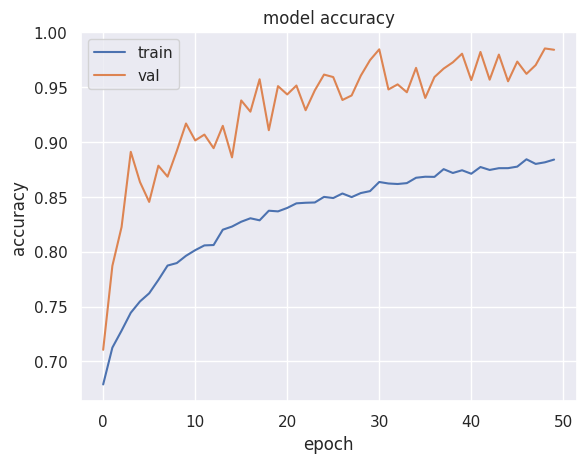

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


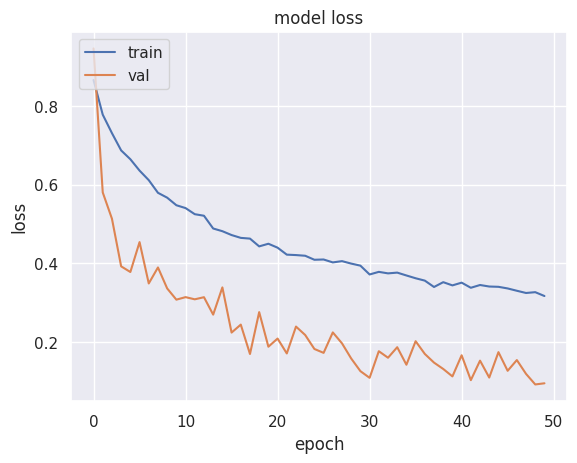

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('/content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Dense.h5')

In [ ]:
# Resize images to (32, 32)
x_test_resized = tf.image.resize(x_test, (32, 32))

# Evaluate the model on the test set
loss, acc = model.evaluate(x_test_resized, y_test, verbose=2)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')


118/118 - 5s - loss: 1.2682 - accuracy: 0.5448 - 5s/epoch - 42ms/step
Test Loss: 1.2681766748428345, Test Accuracy: 0.5448496341705322


In [ ]:
import PIL
image=PIL.Image.open('/content/drive/MyDrive/Skin-Cancer-Classification-80-10-10 split/1234214.jpg')
image=image.resize((32,32))
img=x_test[1]
img=np.array(image).reshape(-1,32,32,3)
result=model.predict(img)
print(result[0])
result=result.tolist()
max_prob=max(result[0])
class_ind=result[0].index(max_prob)
print(classes[class_ind])

1/1 [==============================] - 5s 5s/step
[0.2697151  0.45193672 0.17510076 0.01616307 0.03310531 0.02095091
 0.03302816]
('bcc', 'basal cell carcinoma')


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = np.argmax(model.predict(x_test_resized), axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# You can also print a classification report for additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

118/118 [==============================] - 5s 20ms/step
Confusion Matrix:
[[361 134  14  31   3   2   1]
 [116 347  11  52   6  11   0]
 [111 135 201  51  41   6  19]
 [ 71  53   3 393  11   0   0]
 [ 54  37  51  60 310  12  20]
 [ 30  53   3  57  21 344  14]
 [151  65 113  49  27  11  91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.66      0.50       546
           1       0.42      0.64      0.51       543
           2       0.51      0.36      0.42       564
           3       0.57      0.74      0.64       531
           4       0.74      0.57      0.64       544
           5       0.89      0.66      0.76       522
           6       0.63      0.18      0.28       507

    accuracy                           0.54      3757
   macro avg       0.59      0.54      0.54      3757
weighted avg       0.59      0.54      0.54      3757



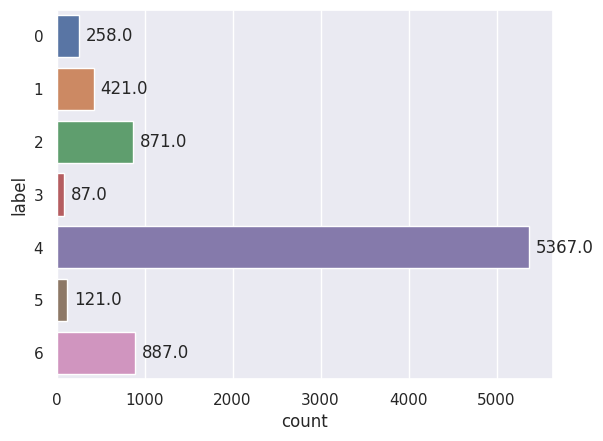

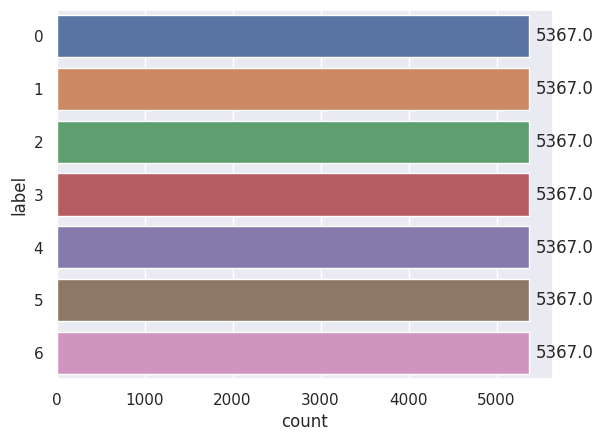

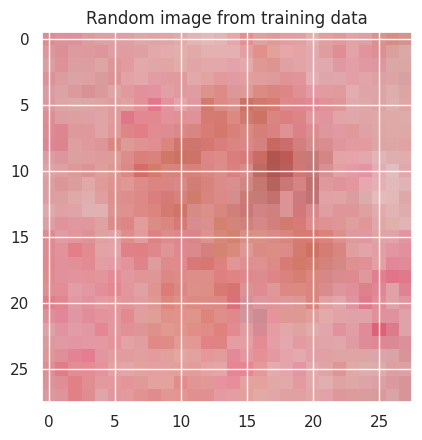

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 1, 1, 1664)        12642880  
                                                                 
 flatten_2 (Flatten)         (None, 1664)              0         
                                                                 
 dropout_6 (Dropout)         (None, 1664)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               426240    
                                                                 
 batch_normalization_8 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


294/294 [==============================] - 27s 50ms/step - loss: 1.4661 - accuracy: 0.4471 - val_loss: 1.1417 - val_accuracy: 0.5594
Epoch 2/50
293/294 [============================>.] - ETA: 0s - loss: 1.0828 - accuracy: 0.5974
Epoch 2: val_loss improved from 1.14168 to 1.20383, saving model to /content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Dense.h5
294/294 [==============================] - 11s 36ms/step - loss: 1.0832 - accuracy: 0.5973 - val_loss: 1.2038 - val_accuracy: 0.5415
Epoch 3/50
293/294 [============================>.] - ETA: 0s - loss: 0.9395 - accuracy: 0.6507
Epoch 3: val_loss did not improve from 1.20383
294/294 [==============================] - 9s 29ms/step - loss: 0.9395 - accuracy: 0.6507 - val_loss: 1.0744 - val_accuracy: 0.5854
Epoch 4/50
293/294 [============================>.] - ETA: 0s - loss: 0.8441 - accuracy: 0.6868
Epoch 4: val_loss did not improve from 1.20383
294/294 [==============================] - 10s 33ms/step - loss: 0.8437 - accura

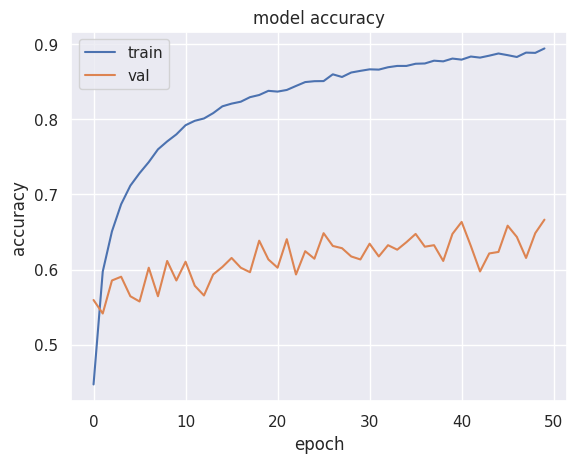

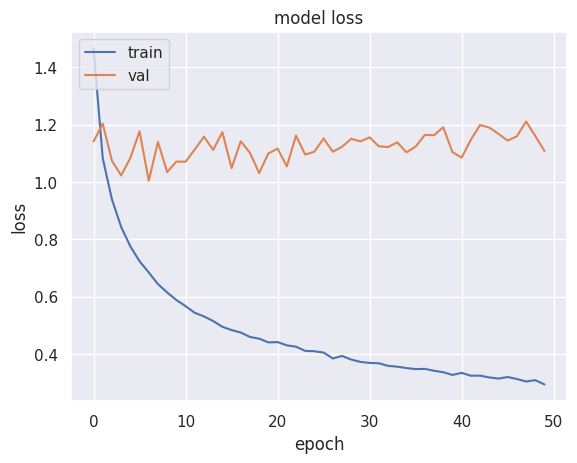

ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load the dataset from the specified paths
train_path = '/content/drive/MyDrive/DL/train_data.csv'
valid_path = '/content/drive/MyDrive/DL/valid_data.csv'
test_path = '/content/drive/MyDrive/DL/test_data.csv'

train_set = pd.read_csv(train_path)
valid_set = pd.read_csv(valid_path)
test_set = pd.read_csv(test_path)

# Define classes
classes = {
    0: ('akiec', 'actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'basal cell carcinoma'),
    2: ('bkl', 'benign keratosis-like lesions'),
    3: ('df', 'dermatofibroma'),
    4: ('nv', 'melanocytic nevi'),
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),
    6: ('mel', 'melanoma'),
}

# Extract labels and features from train, validation, and test sets
y_train = train_set['label']
x_train = train_set.drop(columns=['label'])

y_valid = valid_set['label']
x_valid = valid_set.drop(columns=['label'])

y_test = test_set['label']
x_test = test_set.drop(columns=['label'])

# Countplot for better visibility of class distribution in the training set
sns.set(style="darkgrid")
ax = sns.countplot(y=y_train)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.show()

# Oversample to handle class imbalance
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x_train, y_train = oversample.fit_resample(x_train, y_train)

# Countplot after oversampling
sns.set(style="darkgrid")
ax = sns.countplot(y=y_train)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.show()

# Convert features to NumPy array and reshape
x_train = np.array(x_train, dtype=np.uint8).reshape(-1, 28, 28, 3)

# Display random images from the training data
num = random.randint(0, len(x_train))
plt.imshow(x_train[num].reshape(28, 28, 3))
plt.title("Random image from training data")
plt.show()

# Load the DenseNet-169 model
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
model = Sequential()
model.add(base_model)
model.add(Flatten())

# Add own dense layers on top
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))

# Display the model summary
model.summary()

# Model Checkpoint callback
callback = ModelCheckpoint(
    filepath='/content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Dense.h5',
    mode='max',
    verbose=1,
    save_best_only=True
)

# Resize images to (32, 32) for training and validation sets
x_train_resized = tf.image.resize(x_train, (32, 32))
x_valid_resized = tf.image.resize(np.array(x_valid, dtype=np.uint8).reshape(-1, 28, 28, 3), (32, 32))

# Model compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Model training
history = model.fit(x_train_resized,
                    y_train,
                    validation_data=(x_valid_resized, y_valid),
                    batch_size=128,
                    epochs=50,
                    shuffle=True,
                    callbacks=[callback])

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Load the best model weights
model.load_weights('/content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Dense.h5')




In [ ]:
# Extract labels and features from the test set
y_test = test_set['label']
x_test = test_set.drop(columns=['label'])

# Convert features to NumPy array and reshape for the test set
x_test = np.array(x_test, dtype=np.uint8).reshape(-1, 28, 28, 3)

# Resize images to (32, 32) for the test set
x_test_resized = tf.image.resize(x_test, (32, 32))

# Evaluate the model on the test set
loss, acc = model.evaluate(x_test_resized, y_test, verbose=2)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')

# Generate confusion matrix
y_pred = np.argmax(model.predict(x_test_resized), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

32/32 - 3s - loss: 1.0245 - accuracy: 0.6537 - 3s/epoch - 102ms/step
Test Loss: 1.0245345830917358, Test Accuracy: 0.6536926031112671
32/32 [==============================] - 4s 26ms/step
Confusion Matrix:
[[ 16   7   1   0   1   0   5]
 [  9  24  13   0   4   1   4]
 [  9   7  63   0   5   0  31]
 [  0   2   5   4   1   0   0]
 [  3  10  57   5 459   3 127]
 [  0   0   3   0   1   9   0]
 [  4   3  12   2  11   1  80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.53      0.45        30
           1       0.45      0.44      0.44        55
           2       0.41      0.55      0.47       115
           3       0.36      0.33      0.35        12
           4       0.95      0.69      0.80       664
           5       0.64      0.69      0.67        13
           6       0.32      0.71      0.44       113

    accuracy                           0.65      1002
   macro avg       0.50      0.56      0.52      1002
weighted a

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


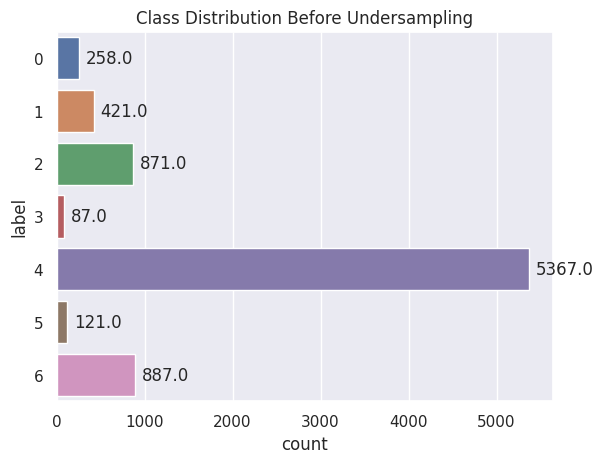

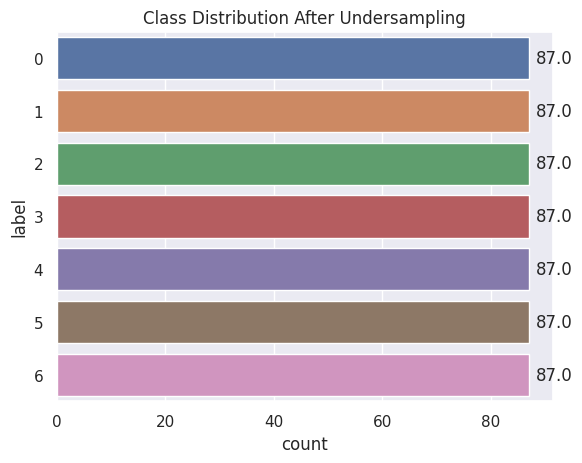

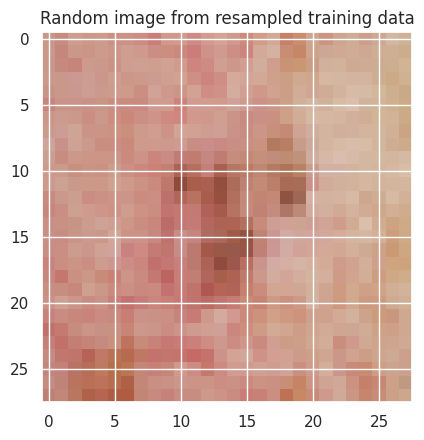

51877672/51877672 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 1, 1, 1664)        12642880  
                                                                 
 flatten (Flatten)           (None, 1664)              0         
                                                                 
 dropout (Dropout)           (None, 1664)              0         
                                                                 
 dense (Dense)               (None, 256)               426240    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 32s 2s/step - loss: 2.3300 - accuracy: 0.1609 - val_loss: 1.7915 - val_accuracy: 0.5375
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 2.0973 - accuracy: 0.2479
Epoch 2: val_loss did not improve from 1.79148
5/5 [==============================] - 0s 94ms/step - loss: 2.0973 - accuracy: 0.2479 - val_loss: 1.7861 - val_accuracy: 0.5964
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 1.9607 - accuracy: 0.2923
Epoch 3: val_loss improved from 1.79148 to 1.95799, saving model to /content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Dense_und.h5
5/5 [==============================] - 2s 385ms/step - loss: 1.9607 - accuracy: 0.2923 - val_loss: 1.9580 - val_accuracy: 0.5694
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 1.8035 - accuracy: 0.3235
Epoch 4: val_loss improved from 1.95799 to 2.02802, saving model to /content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Dense_und.h5
5/5 [

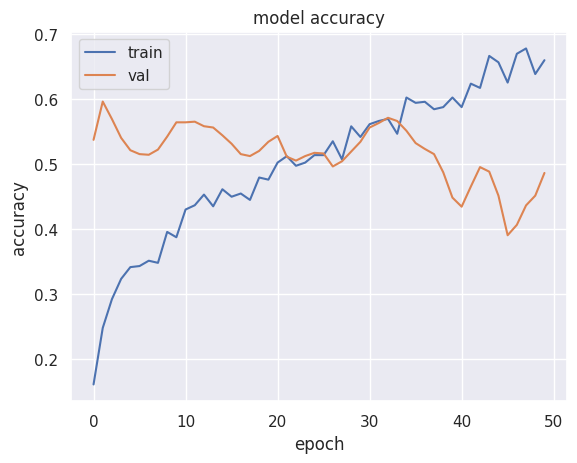

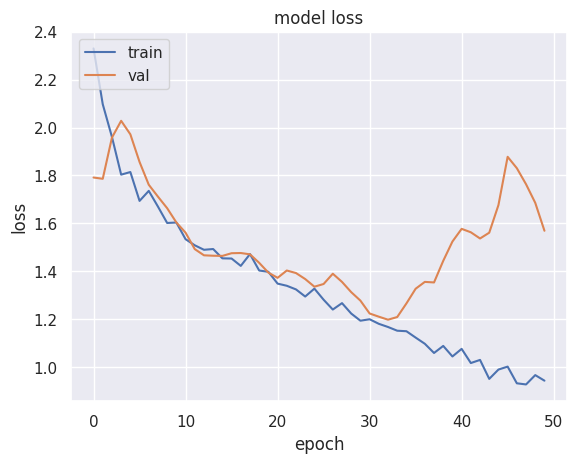

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler  # Import undersampling

# Load the dataset from the specified paths
train_path = '/content/drive/MyDrive/DL/train_data.csv'
valid_path = '/content/drive/MyDrive/DL/valid_data.csv'
test_path = '/content/drive/MyDrive/DL/test_data.csv'

train_set = pd.read_csv(train_path)
valid_set = pd.read_csv(valid_path)
test_set = pd.read_csv(test_path)

# Define classes
classes = {
    0: ('akiec', 'actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'basal cell carcinoma'),
    2: ('bkl', 'benign keratosis-like lesions'),
    3: ('df', 'dermatofibroma'),
    4: ('nv', 'melanocytic nevi'),
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),
    6: ('mel', 'melanoma'),
}

# Extract labels and features from train, validation, and test sets
y_train = train_set['label']
x_train = train_set.drop(columns=['label'])

y_valid = valid_set['label']
x_valid = valid_set.drop(columns=['label'])

y_test = test_set['label']
x_test = test_set.drop(columns=['label'])

# Countplot for better visibility of class distribution in the training set before undersampling
sns.set(style="darkgrid")
ax_before = sns.countplot(y=y_train)
for p in ax_before.patches:
    ax_before.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                       ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.title("Class Distribution Before Undersampling")
plt.show()

# Undersample to handle class imbalance
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
x_train_resampled, y_train_resampled = undersampler.fit_resample(x_train, y_train)

# Countplot after undersampling
sns.set(style="darkgrid")
ax_after = sns.countplot(y=y_train_resampled)
for p in ax_after.patches:
    ax_after.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                      ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.title("Class Distribution After Undersampling")
plt.show()

# Convert features to NumPy array and reshape
x_train_resampled = np.array(x_train_resampled, dtype=np.uint8).reshape(-1, 28, 28, 3)

# Display random images from the training data
num = np.random.randint(0, len(x_train_resampled))
plt.imshow(x_train_resampled[num].reshape(28, 28, 3))
plt.title("Random image from resampled training data")
plt.show()

# Load the DenseNet-169 model
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
model = Sequential()
model.add(base_model)
model.add(Flatten())

# Add own dense layers on top
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))

# Display the model summary
model.summary()

# Model Checkpoint callback
callback = ModelCheckpoint(
    filepath='/content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Dense_und.h5',
    mode='max',
    verbose=1,
    save_best_only=True
)

# Resize images to (32, 32) for training and validation sets
x_train_resized = tf.image.resize(x_train_resampled, (32, 32))
x_valid_resized = tf.image.resize(np.array(x_valid, dtype=np.uint8).reshape(-1, 28, 28, 3), (32, 32))

# Model compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Model training
history = model.fit(x_train_resized,
                    y_train_resampled,
                    validation_data=(x_valid_resized, y_valid),
                    batch_size=128,
                    epochs=50,
                    shuffle=True,
                    callbacks=[callback])

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Load the best model weights
model.load_weights('/content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Dense_und.h5')


In [3]:
# Extract labels and features from the test set
y_test = test_set['label']
x_test = test_set.drop(columns=['label'])

# Convert features to NumPy array and reshape for the test set
x_test = np.array(x_test, dtype=np.uint8).reshape(-1, 28, 28, 3)

# Resize images to (32, 32) for the test set
x_test_resized = tf.image.resize(x_test, (32, 32))

# Evaluate the model on the test set
loss, acc = model.evaluate(x_test_resized, y_test, verbose=2)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')

# Generate confusion matrix
y_pred = np.argmax(model.predict(x_test_resized), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

32/32 - 11s - loss: 1.9325 - accuracy: 0.5230 - 11s/epoch - 352ms/step
Test Loss: 1.9324537515640259, Test Accuracy: 0.5229541063308716
32/32 [==============================] - 7s 30ms/step
Confusion Matrix:
[[  3   0   0   0  22   5   0]
 [  1   0   0   2  30  22   0]
 [  4   1   0   6  59  44   1]
 [  0   0   0   1   7   4   0]
 [  4   6   0  14 512 127   1]
 [  0   1   0   0   4   8   0]
 [  2   1   0   4  91  15   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.10      0.14        30
           1       0.00      0.00      0.00        55
           2       0.00      0.00      0.00       115
           3       0.04      0.08      0.05        12
           4       0.71      0.77      0.74       664
           5       0.04      0.62      0.07        13
           6       0.00      0.00      0.00       113

    accuracy                           0.52      1002
   macro avg       0.14      0.22      0.14      1002
weighted

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
